In [1]:
import finesse
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt

from finesse.simulations.dense import DenseSimulation
from finesse.simulations.KLU import KLUSimulation
from finesse.simulations.operator import OperatorSimulation

import finesse.utilities.operators.graph_funs as gf

from finesse.utilities.operators.optical_operators import PlanewaveOperator

%load_ext memory_profiler
%load_ext line_profiler

In [11]:
f3_code = f'''
l lasera 1.234 0 0 n0a
s s0a 0 n0a n1

l laserb 2.341 0 34.56 n0b
s s0b 0 n0b n2

m1 mirror 0.5 0 0 n1 n2

ad ad_n1 0 n1
ad ad_n2 0 n2

xaxis mirror phi lin -10 190 1000
yaxis re:im
'''

In [12]:
ifo_op = finesse.parse(f3_code, finesse2=True)
model_op = ifo_op.model
model_op.mirror.phi.is_tunable = True
op_sim = model_op.build(carrier_sim_type=OperatorSimulation)[0]

with op_sim:
    out_op = ifo_op.run()

In [13]:
ifo_klu = finesse.parse(f3_code, finesse2=True)
model_klu = ifo_klu.model
model_klu.mirror.phi.is_tunable = True
klu_sim = model_klu.build(carrier_sim_type=KLUSimulation)[0]

with klu_sim:
    out_klu = ifo_klu.run()

In [14]:
ifo_dense = finesse.parse(f3_code, finesse2=True)
model_dense = ifo_dense.model
model_dense.mirror.phi.is_tunable = True
dense_sim = model_dense.build(carrier_sim_type=DenseSimulation)[0]

with dense_sim:
    out_dense = ifo_dense.run()

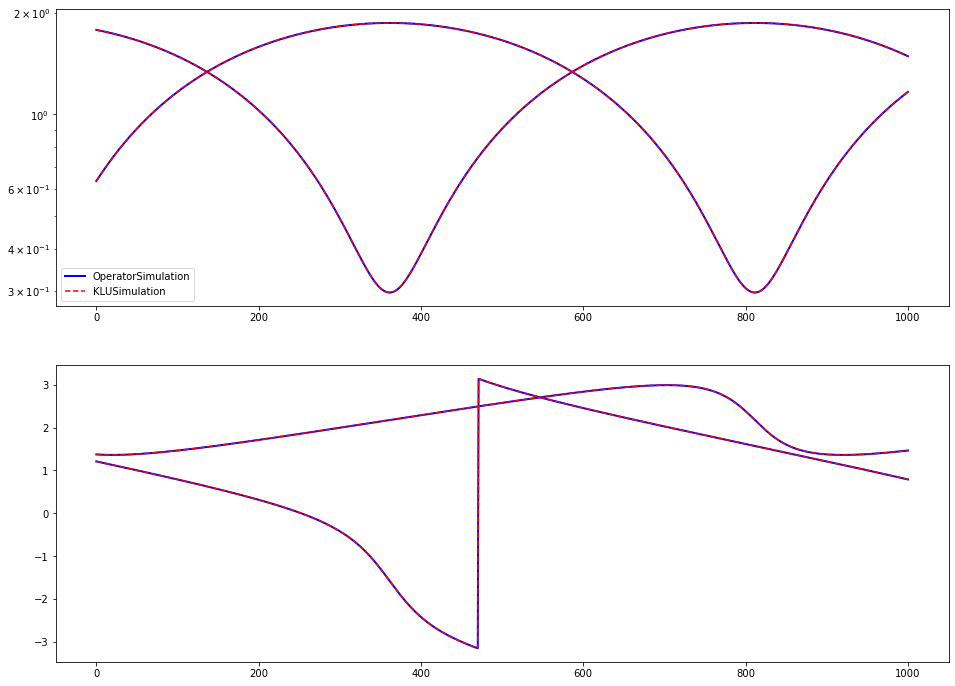

In [15]:
fig, ax = plt.subplots(2, 1, figsize=[16, 12])
ax[0].semilogy(abs(out_op['ad_n1']) ,c='b',lw=2,label='OperatorSimulation')
ax[0].semilogy(abs(out_op['ad_n2']) ,c='b',lw=2)
# ax[0].semilogy(abs(out_dense['ad_n1']) ,c='g',lw=1.5,ls='-',label='DenseSimulation')
# ax[0].semilogy(abs(out_dense['ad_n2']) ,c='g',lw=1.5,ls='-')
ax[0].semilogy(abs(out_klu['ad_n1']) ,c='r',lw=1.5,ls='--',label='KLUSimulation')
ax[0].semilogy(abs(out_klu['ad_n2']) ,c='r',lw=1.5,ls='--')

ax[0].legend()

ax[1].plot(np.angle(out_op['ad_n1']) ,c='b',lw=2)
ax[1].plot(np.angle(out_op['ad_n2']) ,c='b',lw=2)
ax[1].plot(np.angle(out_klu['ad_n1']) ,c='r',lw=1.5,ls='--')
ax[1].plot(np.angle(out_klu['ad_n2']) ,c='r',lw=1.5,ls='--')